# Setup and Load Data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('creditcard.csv', sep=',')
data_n = data.values

features = data.columns[1:-1]

X = data_n[:,1:-1]
y = data_n[:,-1]

if len(X.shape) == 1:
    X = X.reshape(-1,1)
if (len(y.shape) == 1):
    y = y.reshape(-1,1)

if (len(y.shape) != 2) or (len(X.shape) != 2):
    print("Error: X and y must be 2D arrays")
    exit(1)

if (X.shape[0] != y.shape[0] != data.shape[0]):
    print("Error: X and y must have the same number of rows")
    exit(1)


# Data Analysis

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Examples Count

Number of positive examples:  492
Number of negative examples:  284315


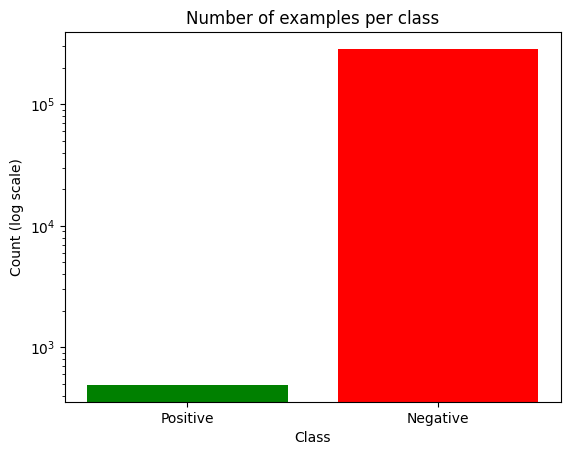

Percentage of positive examples:  0.1727485630620034
Percentage of negative examples:  99.82725143693798


In [16]:
# Number of examples per class
posidx = np.where(y == 1)[0]
negidx = np.where(y == 0)[0]

print("Number of positive examples: ", len(posidx))
print("Number of negative examples: ", len(negidx))
plt.bar(['Positive', 'Negative'], [len(posidx), len(negidx)], color=['g', 'r'])
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Class')  # Update x-axis label
plt.ylabel('Count (log scale)')  # Update y-axis label
plt.title('Number of examples per class')  # Update plot title
plt.show()
# plt.ylabel('Count (log scale)')  # Update y-axis label

print("Percentage of positive examples: ", len(posidx)/len(y)*100)
print("Percentage of negative examples: ", len(negidx)/len(y)*100)

# Correlation Matrix

Correlation of features in the original dataset

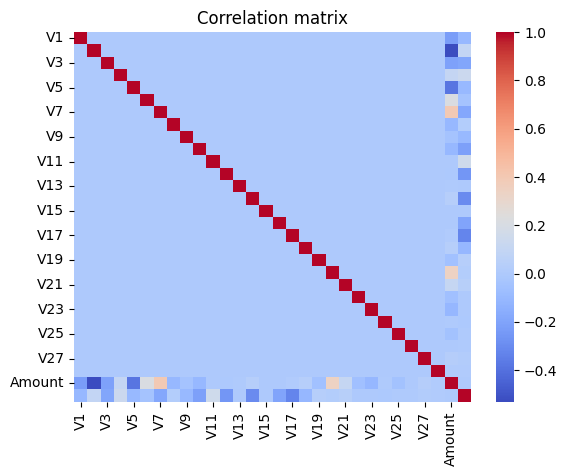

In [17]:
import seaborn as sns

# Assuming data is a pandas DataFrame
xPandas = pd.DataFrame(X, columns=features)
yPandas = pd.DataFrame(y, columns=['Class'])

# Concatenate the features and target variable
dataPandas = pd.concat([xPandas, yPandas], axis=1)

correlation_matrix = dataPandas.corr()

#Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# Normalization of features

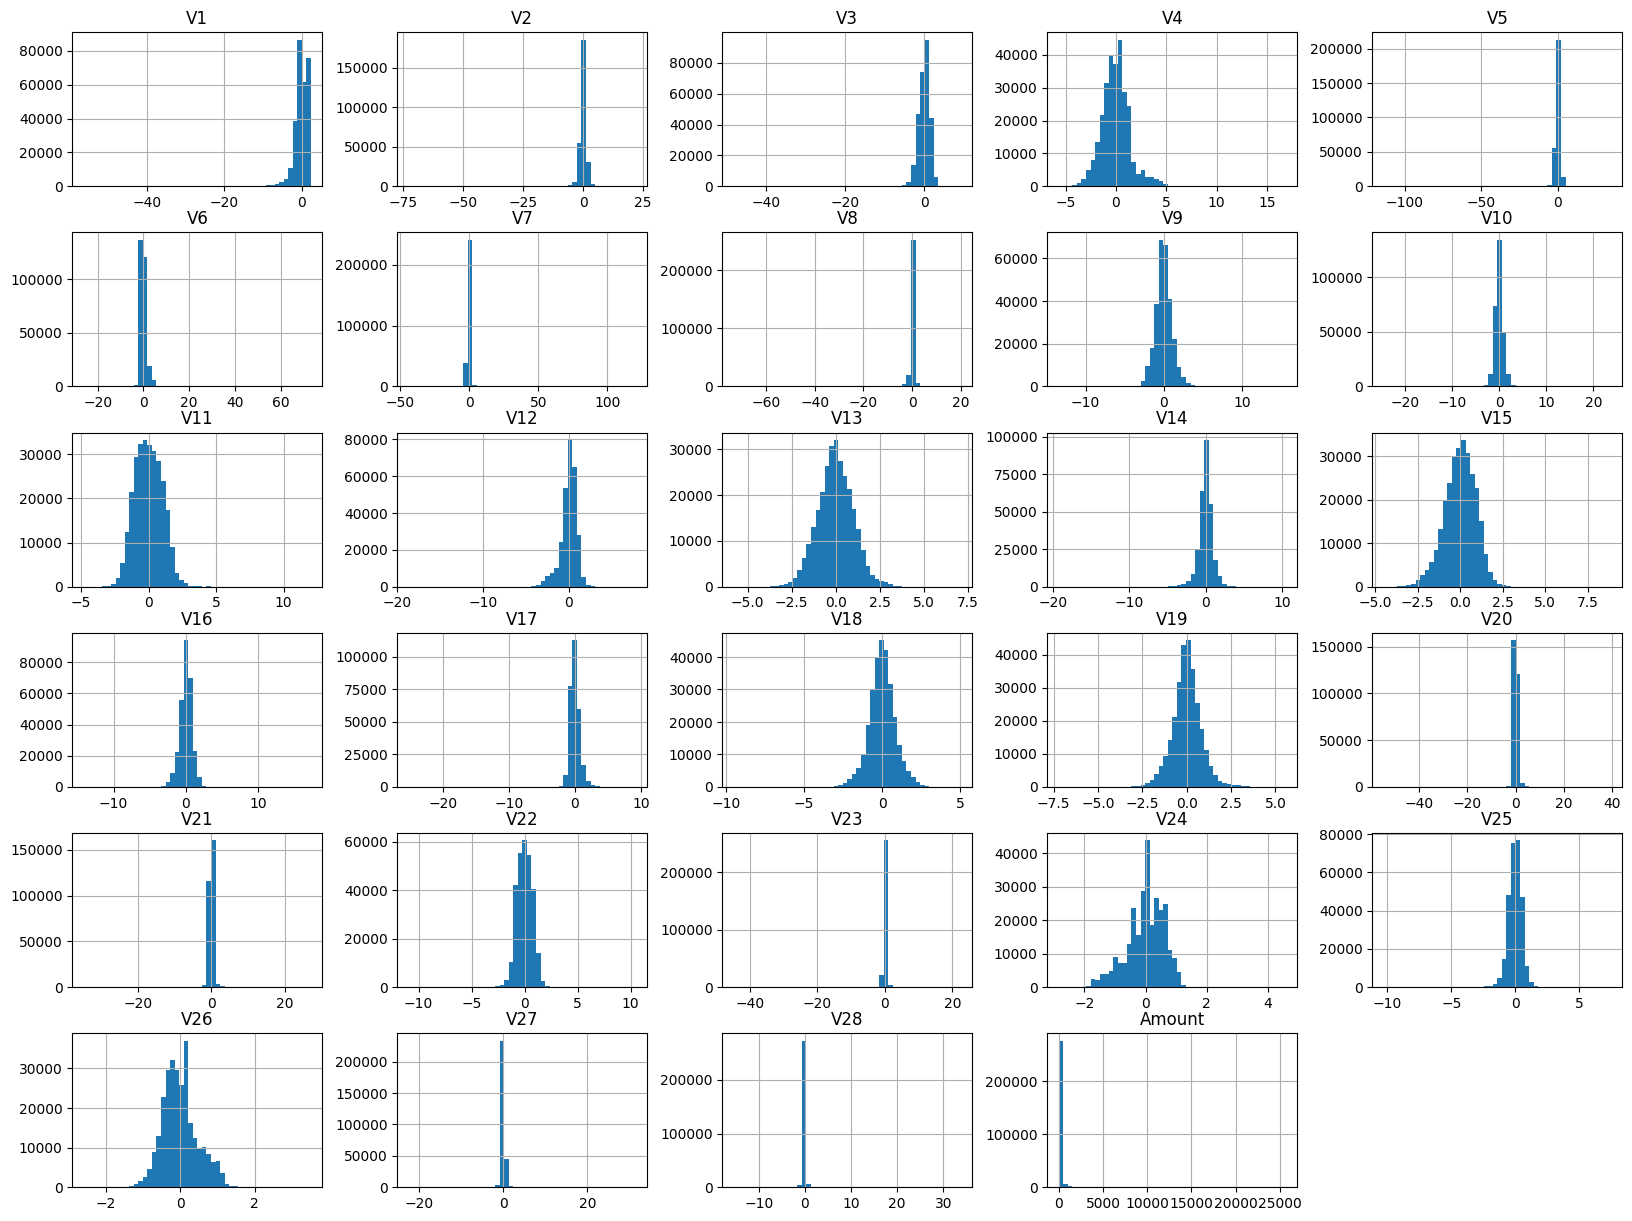

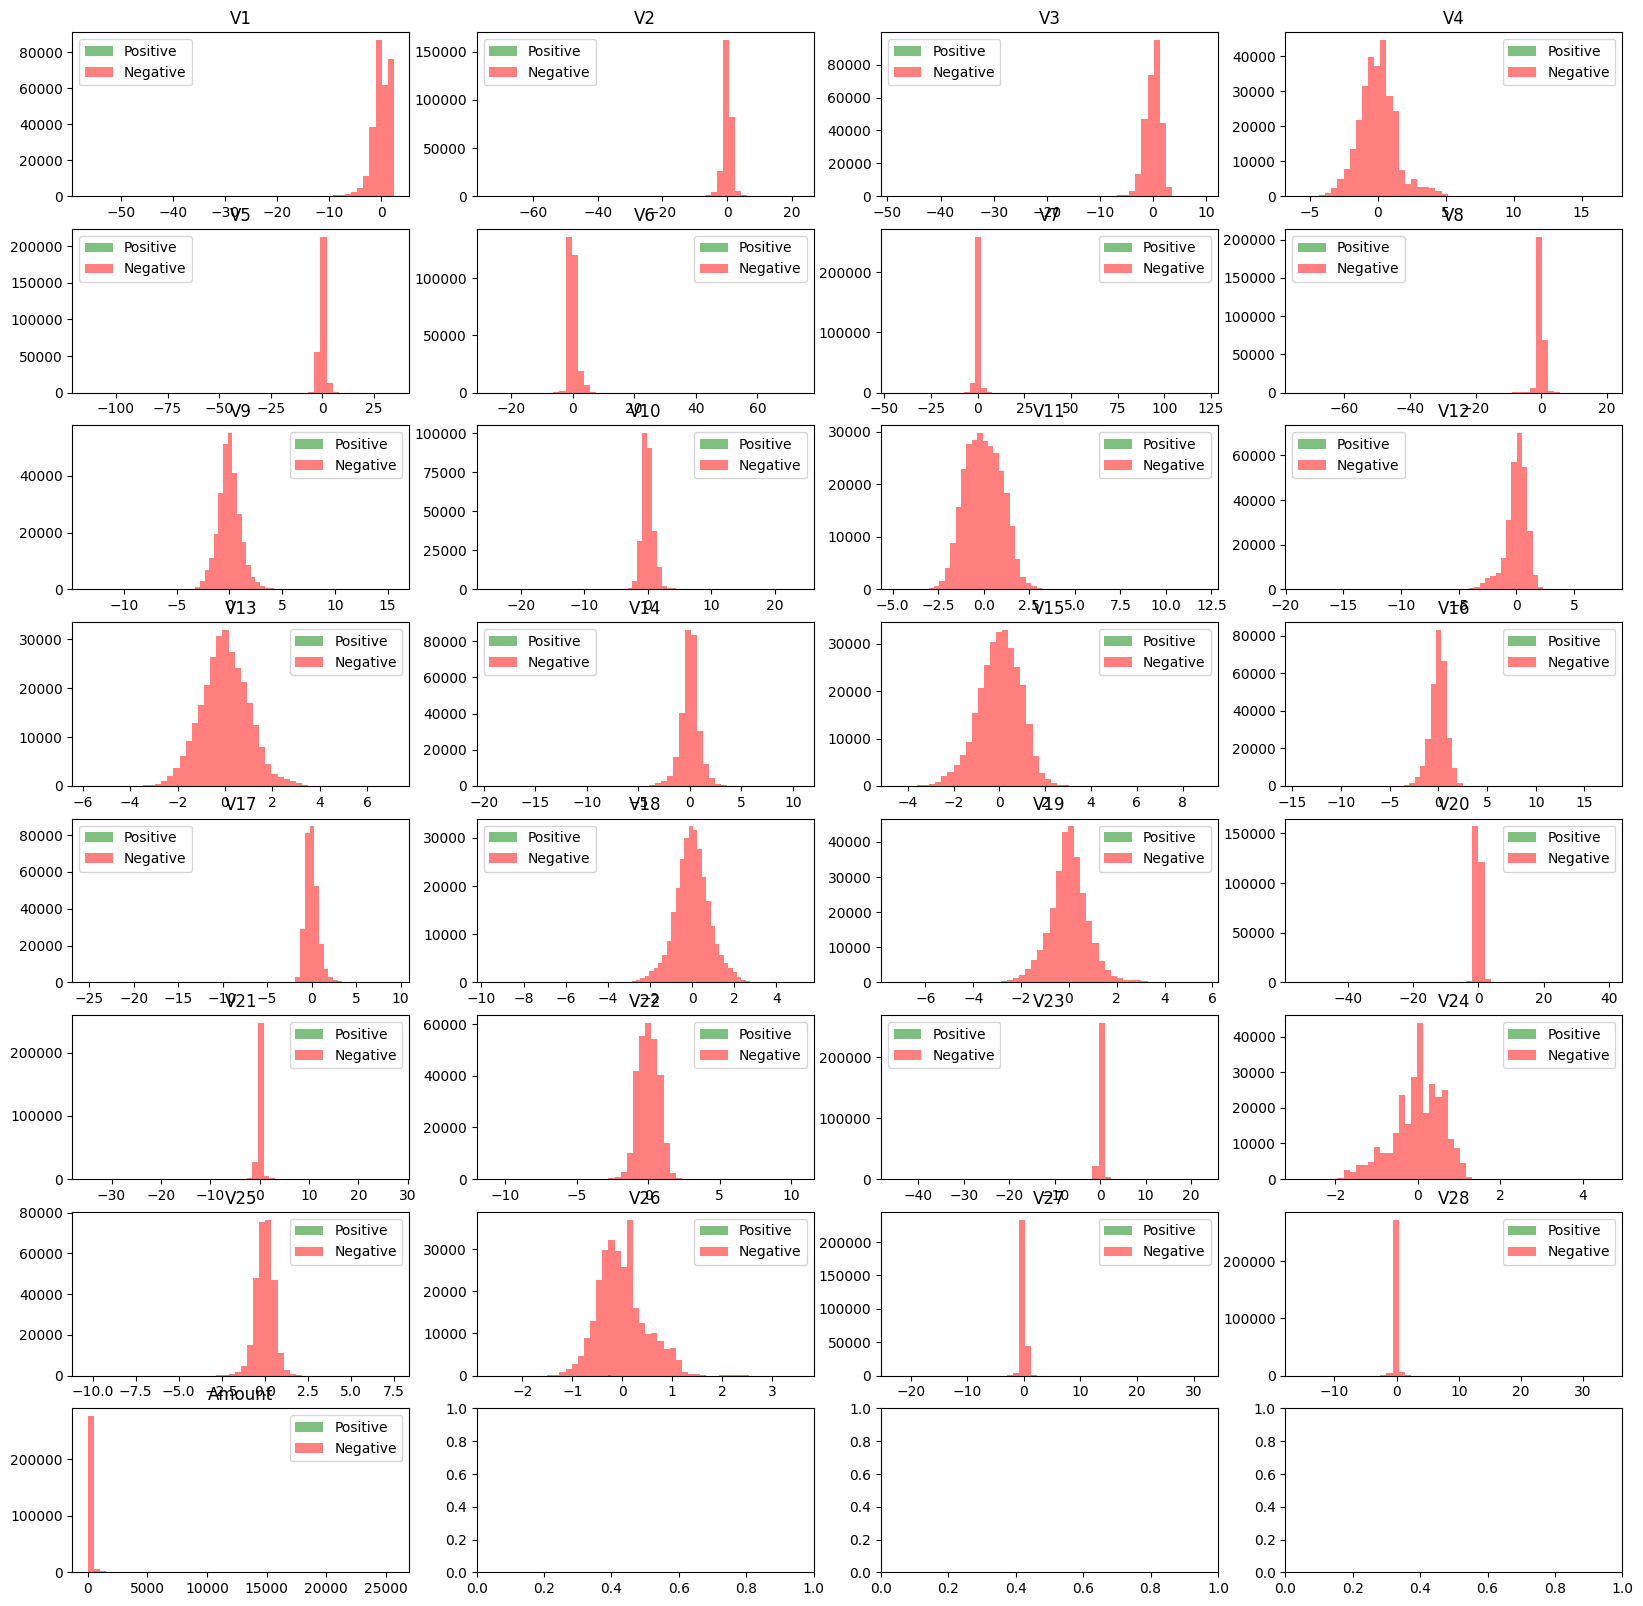

Before normalization:
Mean:  [ 1.16837498e-15  3.41690805e-16 -1.37953671e-15  2.07409512e-15
  9.60406632e-16  1.48731301e-15 -5.55646730e-16  1.21348136e-16
 -2.40633055e-15  2.23905274e-15  1.67332693e-15 -1.24701177e-15
  8.19000127e-16  1.20729421e-15  4.88745586e-15  1.43771595e-15
 -3.77217069e-16  9.56414917e-16  1.03991661e-15  6.40620363e-16
  1.65406691e-16 -3.56859322e-16  2.57864790e-16  4.47326553e-15
  5.34091469e-16  1.68343720e-15 -3.66009081e-16 -1.22739000e-16
  8.83496193e+01]
Std:  [  1.95869237   1.65130568   1.51625234   1.41586609   1.38024431
   1.33226875   1.23709143   1.19435081   1.09863016   1.08884785
   1.02071124   0.99919964   0.99527248   0.95859393   0.9153144
   0.87625135   0.84933557   0.83817474   0.81403907   0.77092367
   0.73452272   0.72570029   0.6244592    0.605646     0.52127716
   0.48222617   0.40363179   0.33008268 250.11967014]
After normalization:
Mean:  [-1.50687242e-17 -9.58011603e-18 -8.62210442e-17 -5.18922951e-18
  3.83204641e-17

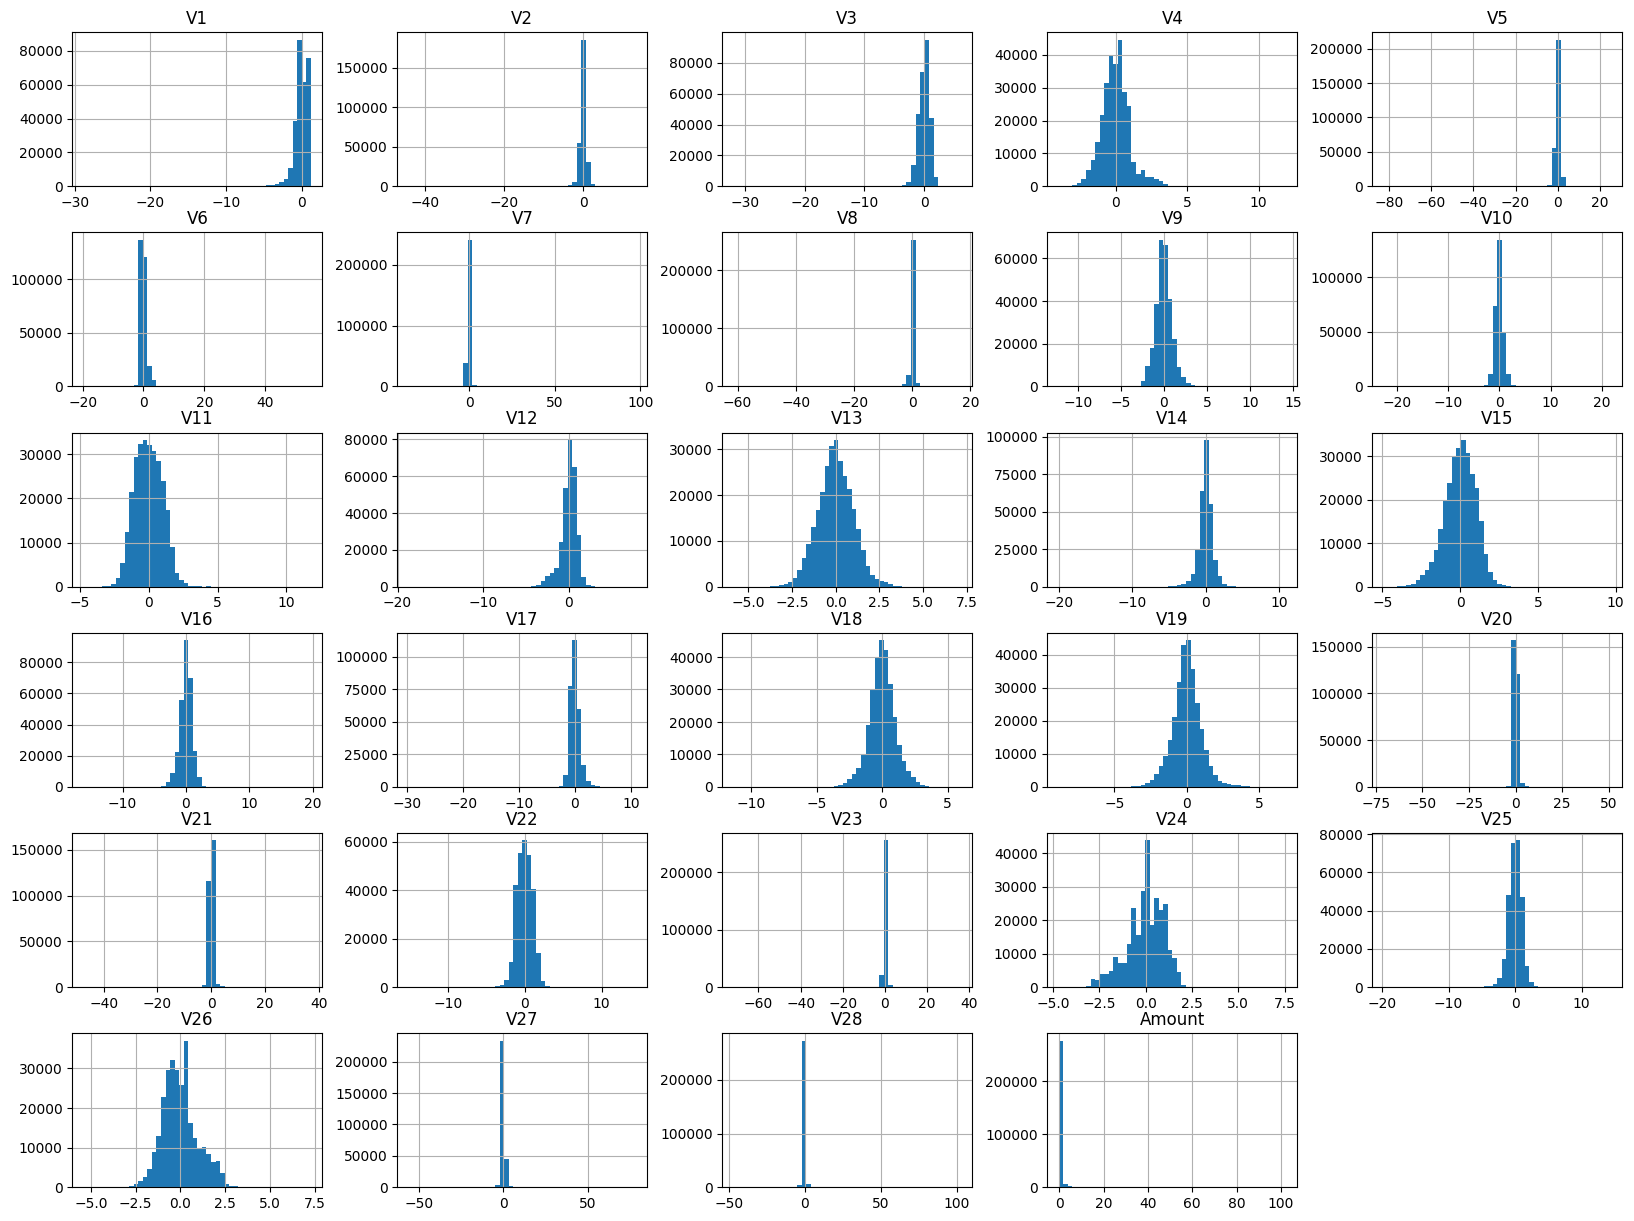

In [18]:
# Plot the distribution of the features
data[features].hist(bins=50, figsize=(20,15))
plt.show()

# Plot the distribution of the features for positive and negative examples
data_pos = data.loc[data['Class'] == 1]
data_neg = data.loc[data['Class'] == 0]

fig, axs = plt.subplots(8, 4, figsize=(20, 20))

for i, feature in enumerate(features):
    ax = axs[i//4, i%4]
    ax.hist(data_pos[feature], bins=50, color='g', alpha=0.5, label='Positive')
    ax.hist(data_neg[feature], bins=50, color='r', alpha=0.5, label='Negative')
    ax.set_title(feature)
    ax.legend()

plt.show()

# normalize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

print("Before normalization:")
print("Mean: ", np.mean(X, axis=0))
print("Std: ", np.std(X, axis=0))
X_Normalized = scaler.fit_transform(X)
print("After normalization:")
print("Mean: ", np.mean(X_Normalized, axis=0))
print("Std: ", np.std(X_Normalized, axis=0))

# Plot the distribution of the features after normalization
data_normalized = pd.DataFrame(X_Normalized, columns=features)
data_normalized.hist(bins=50, figsize=(20,15))
plt.show()





# Create Training, Validation and Test Sets

Number of training examples:  139554
Number of validation examples:  59810
Number of test examples:  85443
Percentage of positive examples in training set:  0.17269300772460838
Percentage of positive examples in validation set:  0.1722120046814914
Percentage of positive examples in test set:  0.17321489179921118


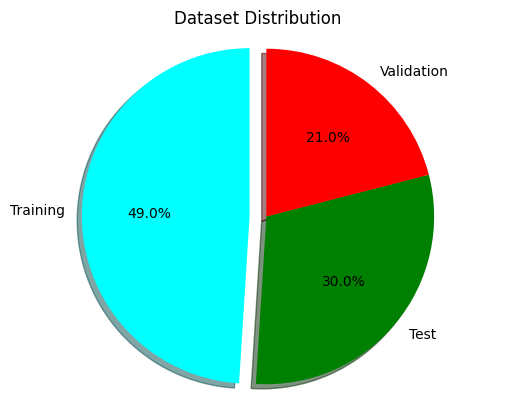

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Normalized, y, test_size=0.3, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

print("Number of training examples: ", len(y_train))
print("Number of validation examples: ", len(y_val))
print("Number of test examples: ", len(y_test))

# get percentage of positive examples in each set
print("Percentage of positive examples in training set: ", np.sum(y_train)/len(y_train)*100)
print("Percentage of positive examples in validation set: ", np.sum(y_val)/len(y_val)*100)
print("Percentage of positive examples in test set: ", np.sum(y_test)/len(y_test)*100)

# percentage 
train_percentage = len(y_train)/len(y)*100
val_percentage = len(y_val)/len(y)*100
test_percentage = len(y_test)/len(y)*100

labels = 'Training', 'Test', 'Validation'
sizes = [train_percentage, test_percentage, val_percentage]
colors = ['cyan', 'green', 'red']
explode = (0.1, 0, 0)  # only "explode" the 1st slice (training)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Dataset Distribution')
plt.show()

### Data Balancing
Data balancing can be done in two ways:
1. Under-sampling: Remove some examples from the majority class.
2. Over-sampling: Add more examples to the minority class.

#### Over-Sampling

Number of positive examples in training set:  241.0
Number of negative examples in training set:  139313.0
Number of positive examples in training set after oversampling:  139313.0
Number of negative examples in training set after oversampling:  139313.0


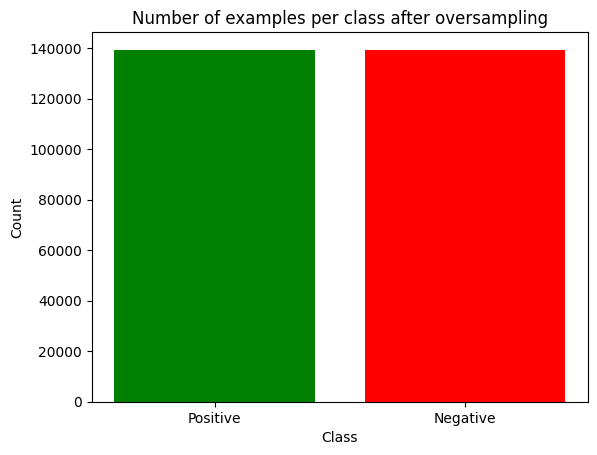

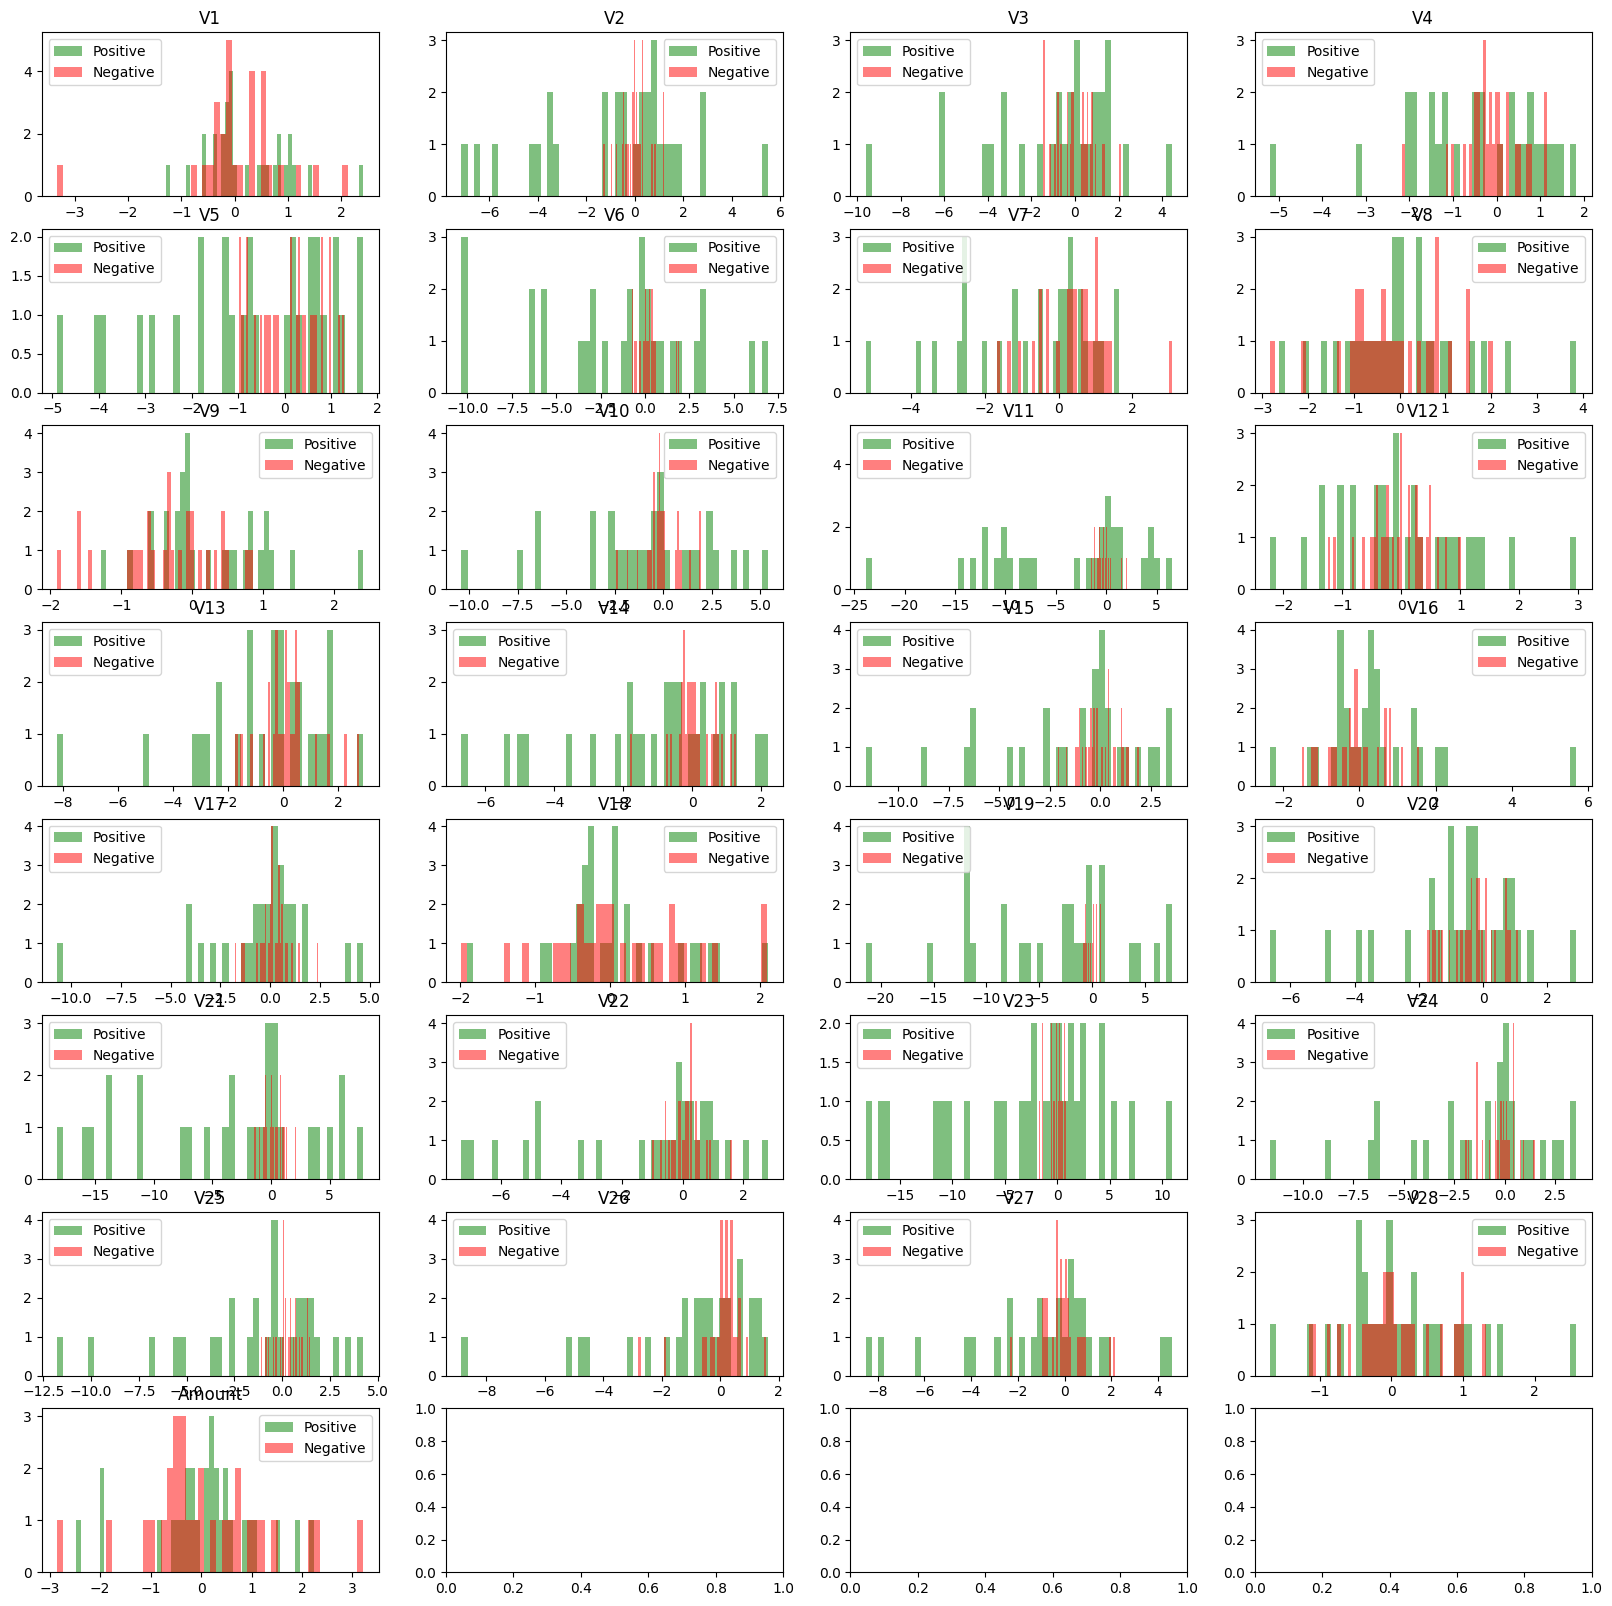

In [20]:
num_ofPos = int( np.nonzero(y_train)[0].shape[0])
num_ofNeg = len(y_train) - num_ofPos
print("Number of positive examples in training set: ", np.sum(y_train))
print("Number of negative examples in training set: ", len(y_train) - np.sum(y_train))

# Oversample the positive examples in the training set
num_of_pos_to_add = num_ofNeg - num_ofPos

posidx = np.where(y_train == 1)[0]
negidx = np.where(y_train == 0)[0]

posX_train_pos = X_train[posidx]
posy_train_pos = y_train[posidx]
posX_train_neg = X_train[posidx]
posy_train_neg = y_train[posidx]


# Randomly select positive examples to duplicate
np.random.seed(42)
idx = np.random.choice(posidx, num_of_pos_to_add)
X_train_pos = np.concatenate((X_train[idx], posX_train_pos), axis=0)
y_train_pos = np.concatenate((y_train[idx], posy_train_pos), axis=0)

overSampledX_train = np.concatenate((X_train[negidx], X_train_pos), axis=0)
overSampledY_train = np.concatenate((y_train[negidx], y_train_pos), axis=0)

print("Number of positive examples in training set after oversampling: ", np.sum(overSampledY_train))
print("Number of negative examples in training set after oversampling: ", len(overSampledY_train) - np.sum(overSampledY_train))

# plot the distribution of the classes after oversampling
plt.bar(['Positive', 'Negative'], [np.sum(overSampledY_train), len(overSampledY_train) - np.sum(overSampledY_train)], color=['g', 'r'])
plt.xlabel('Class')  # Update x-axis label
plt.ylabel('Count')  # Update y-axis label
plt.title('Number of examples per class after oversampling')  # Update plot title
plt.show()
# plot bin graph of features
fig, axs = plt.subplots(8, 4, figsize=(20, 20))

overSampledX_pos = overSampledX_train[np.where(overSampledY_train == 1)[0]]
overSampledX_neg = overSampledX_train[np.where(overSampledY_train == 0)[0]]
for i, feature in enumerate(features):
    ax = axs[i//4, i%4]
    ax.hist(overSampledX_pos[i], bins=50, color='g', alpha=0.5, label='Positive')
    ax.hist(overSampledX_neg[i], bins=50, color='r', alpha=0.5, label='Negative')
    ax.set_title(feature)
    ax.legend()


#### Under-Sampling

Number of negative examples to remove:  139072
Number of positive examples in training set after undersampling:  241.0
Number of negative examples in training set after undersampling:  241.0
Number of positive examples in original training set:  241.0
Number of negative examples in original training set:  139313.0


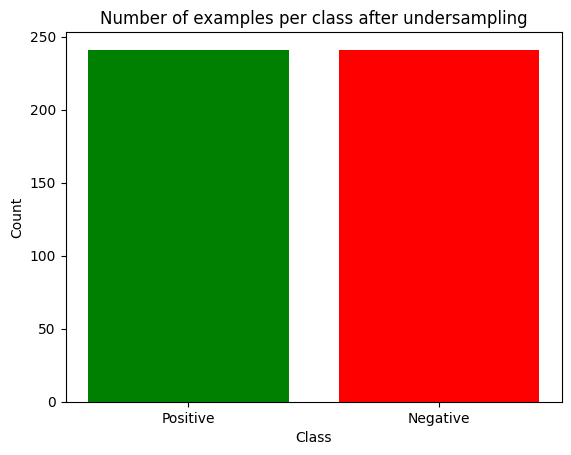

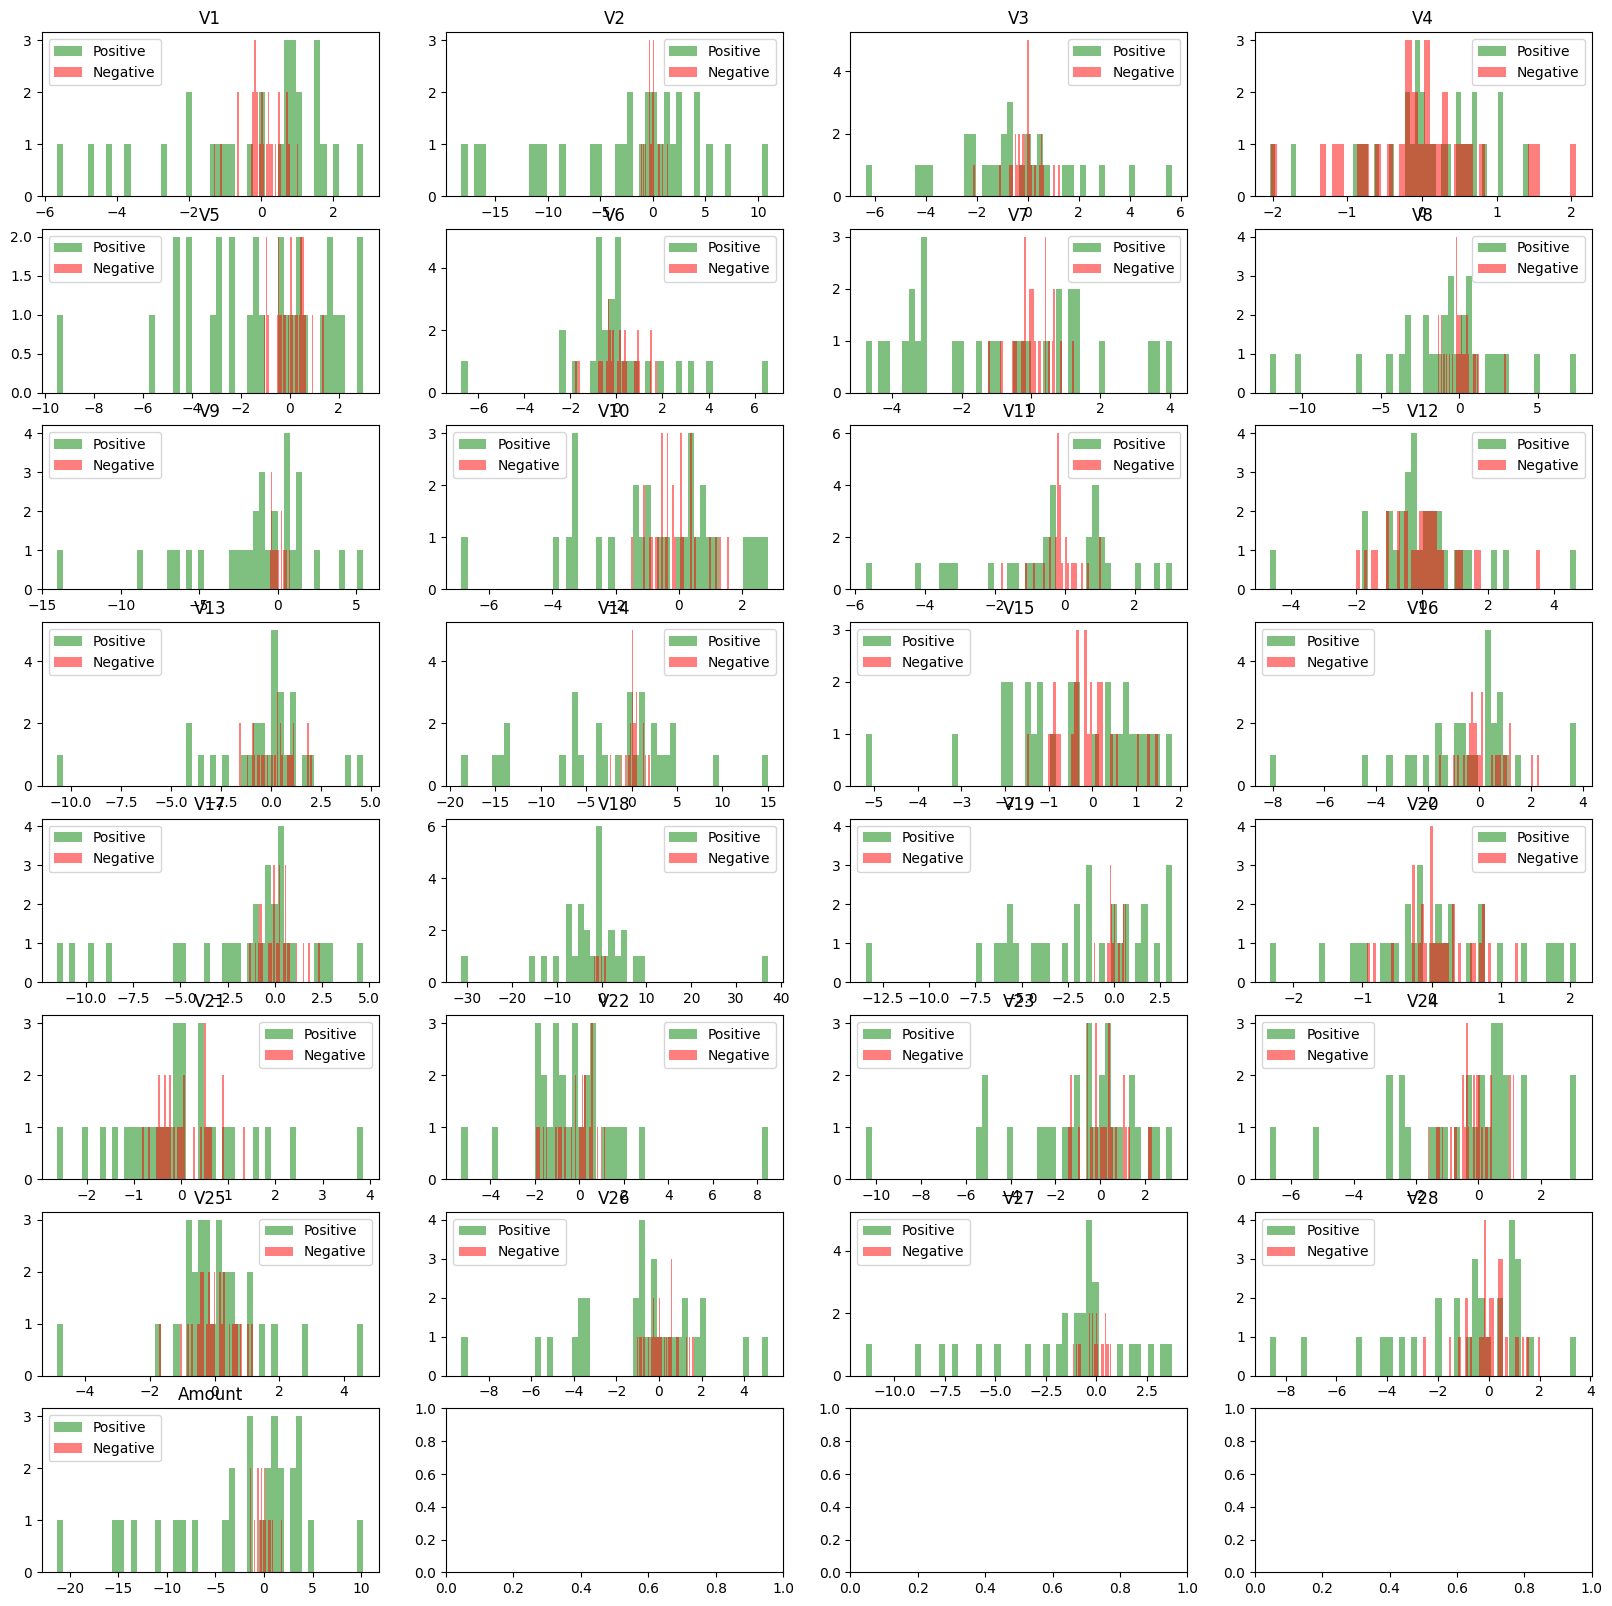

In [21]:
# Calculate number to remove
num_to_remove = num_ofNeg - num_ofPos
print("Number of negative examples to remove: ", num_to_remove)

# Randomly select negative examples to remove
np.random.seed(42)
idx = np.random.choice(negidx, num_to_remove, replace=False)

undersampledX_train = np.delete(X_train, idx, axis=0)
undersampledY_train = np.delete(y_train, idx, axis=0)

print("Number of positive examples in training set after undersampling: ", np.sum(undersampledY_train))
print("Number of negative examples in training set after undersampling: ", len(undersampledY_train) - np.sum(undersampledY_train))

print("Number of positive examples in original training set: ", np.sum(y_train))
print("Number of negative examples in original training set: ", len(y_train) - np.sum(y_train))

# plot the distribution of the classes after undersampling
plt.bar(['Positive', 'Negative'], [np.sum(undersampledY_train), len(undersampledY_train) - np.sum(undersampledY_train)], color=['g', 'r'])
plt.xlabel('Class')  # Update x-axis label
plt.ylabel('Count')  # Update y-axis label
plt.title('Number of examples per class after undersampling')  # Update plot title
plt.show()


fig, axs = plt.subplots(8, 4, figsize=(20, 20))

underSampledX_pos = undersampledX_train[np.where(undersampledY_train == 1)[0]]
underSampledX_neg = undersampledX_train[np.where(undersampledY_train == 0)[0]]
for i, feature in enumerate(features):
    ax = axs[i//4, i%4]
    ax.hist(underSampledX_pos[i], bins=50, color='g', alpha=0.5, label='Positive')
    ax.hist(underSampledX_neg[i], bins=50, color='r', alpha=0.5, label='Negative')
    ax.set_title(feature)
    ax.legend()

# Correlation of features in training set
After normalization, and balancing the data.

In [22]:
# Over-sampling

overSampleXPandas = pd.DataFrame(overSampledX_train, columns=features)
overSampleYPandas = pd.DataFrame(overSampledY_train, columns=['Class'])

correlation_matrix = overSampleXPandas.corr()

# Under-sampling

underSampleXPandas = pd.DataFrame(undersampledX_train, columns=features)
underSampleYPandas = pd.DataFrame(undersampledY_train, columns=['Class'])

correlation_matrix = underSampleXPandas.corr()



### Best Features Selection

<Figure size 2400x1000 with 0 Axes>

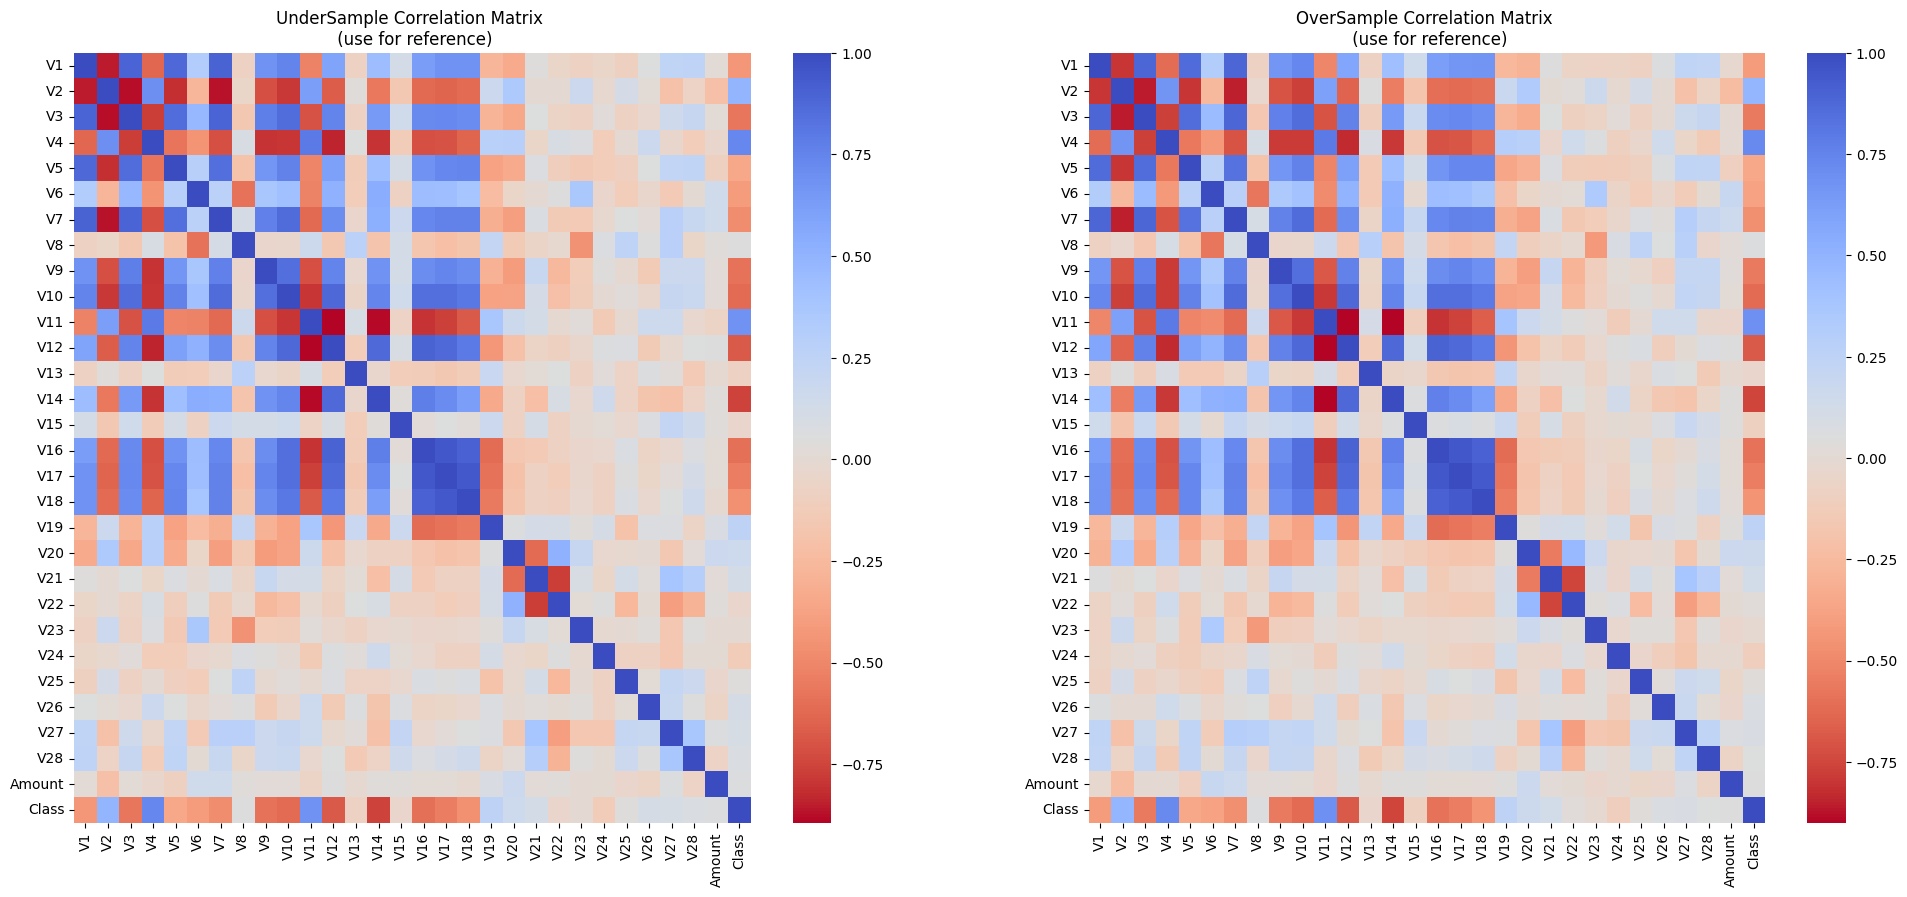

Best features: V3, V4, V9, V10, V11, V12, V14, V16, V17
Best features: V3, V4, V9, V10, V11, V12, V14, V16, V17


In [28]:
import seaborn as sns

plt.figure(1, figsize=(24,10))

# combine the training data with the class labels
under_sample = pd.concat([underSampleXPandas, underSampleYPandas], axis=1)
under_sample_corr = under_sample.corr()
over_sample = pd.concat([overSampleXPandas, overSampleYPandas], axis=1)
over_sample_corr = over_sample.corr()

# Create the heatmap\

fig,  axs = plt.subplots(1, 2, figsize=(24, 10))
sns.heatmap(under_sample_corr, cmap='coolwarm_r', ax=axs[0])
axs[0].set_title('UnderSample Correlation Matrix \n (use for reference)')

sns.heatmap(over_sample_corr, cmap='coolwarm_r', ax=axs[1])
axs[1].set_title('OverSample Correlation Matrix \n (use for reference)')
plt.show()

significance_treshold = .5

# Select the best features
class_corr = under_sample_corr['Class']

under_best_features = class_corr[class_corr.abs() > significance_treshold].index.values[:-1]
over_best_features = class_corr[class_corr.abs() > significance_treshold].index.values[:-1]

under_best_features_idx = [np.where(features == f)[0][0] for f in under_best_features]
over_best_features_idx = [np.where(features == f)[0][0] for f in over_best_features]

print("Best features:", ', '.join(under_best_features))
print("Best features:", ', '.join(over_best_features))

# Export all the sets

## Base
- Training set (X_train, y_train)
- Validation set (X_val, y_val)
- Test set (X_test, y_test)

## Over-Sampling
### No selection
- Training set (overSampledX_train, overSampledY_train)
- Validation set (X_val, y_val - same as base)
- Test set (X_test, y_test - same as base)

### With selection
- Training set (best_overSampledX_train, overSampledY_train)
- Validation set (best_X_val, y_val)
- Test set (best_X_test, y_test)

## Under-Sampling
### No selection
- Training set (underSampledX_train, underSampledY_train)
- Validation set (X_val, y_val - same as base)
- Test set (X_test, y_test - same as base)

### With selection
- Training set (best_underSampledX_train, underSampledY_train)  
- Validation set (best_X_val, y_val)
- Test set (best_X_test, y_test)



In [24]:
# export the data
# create base path
import os
base_path = 'sets/'
# create base folder for the sets
os.makedirs(base_path, exist_ok=True)

# create the sets
# Base
np.save(base_path + 'X_train.npy', X_train)
np.save(base_path + 'y_train.npy', y_train)
np.save(base_path + 'X_val.npy', X_val)
np.save(base_path + 'y_val.npy', y_val)
np.save(base_path + 'X_test.npy', X_test)
np.save(base_path + 'y_test.npy', y_test)

# Under-sampled
## No selection
np.save(base_path + 'under_sampled_X_train.npy', undersampledX_train)
np.save(base_path + 'under_sampled_y_train.npy', undersampledY_train)
### No need to save the validation set or the test set as they are the same

## With selection
np.save(base_path + 'under_sampled_best_X_train.npy', undersampledX_train[:, under_best_features_idx])
np.save(base_path + 'under_sampled_best_X_val.npy', X_val[:, under_best_features_idx])
np.save(base_path + 'under_sampled_best_X_test.npy', X_test[:, under_best_features_idx])

# Over-sampled
## No selection
np.save(base_path + 'over_sampled_X_train.npy', overSampledX_train)
np.save(base_path + 'over_sampled_y_train.npy', overSampledY_train)
### No need to save the validation set or the test set as they are the same

## With selection
np.save(base_path + 'over_sampled_best_X_train.npy', overSampledX_train[:, over_best_features_idx])
np.save(base_path + 'over_sampled_best_X_val.npy', X_val[:, over_best_features_idx])
np.save(base_path + 'over_sampled_best_X_test.npy', X_test[:, over_best_features_idx])
